# 1.1 Loading Data into Python
## opening and reading files

In [12]:
%cat data/some_file.txt

In [11]:
fname='data/some_file.txt'
f=open(fname,'r')
content=f.read()
f.close()
print(content)

In [10]:
fname= 'data/some_file.txt'
with open(fname,'r') as f:
    content=f.read()
print(content)

In [17]:
fname='data/some_file.txt'
with open(fname,'r') as f:
    for i,line in enumerate(f):
        print("line {}:{}".format(i,line.strip()))

# JSON
JavaScript Object Notation
Good FOR DATA serizlization and communication betwwen service

In [1]:
import json
fname="data/movie.json"
with open(fname,'r') as f:
    content=f.read()
    movie=json.loads(content)
    
movie

{'title': 'fight club',
 'watched': True,
 'year': 1999,
 'actors': ['Brad Pitt', 'Edward Norton', 'Helena Bonham Carter']}

In [21]:
import json

fname="data/movie.json"
with open(fname,'r') as f:
    movie_alt=json.load(f)

In [23]:
movie==movie_alt

In [25]:
print(json.dumps(movie,indent=4))

In [28]:
%cat "data/movie.json"

In [30]:
import json
fname="data/movie.json"
with open(fname,'r') as f:
    for line in f:
        try:
            movie=json.loads(line)
            print(movie['title'])
        except:
            

# csv files
comma separated values
this format is very common for import/export for spreadsheet and database

In [32]:
%cat "data/titanic.csv"

In [36]:
import csv
fname="data/titanic.csv"
with open(fname,'r') as f:
    data_reader=csv.reader(f,delimiter=',')
    headers=next(data_reader)
    print("Headers={}".format(headers))
    for line in data_reader:
        print(line)

In [40]:
fname="data/titanic.csv"
with open(fname,'r') as f:
    data_reader=csv.reader(f,delimiter=',')
    headers=next(data_reader)
    data=[]
    for line in data_reader:
        item={headers[i]:value for i,value in enumerate(line)}
        data.append(item)
data

# pickles python object serialization

In [42]:
with open("data/movie.json",'r') as f:
    content=f.read()
    data=json.loads(content)
data

In [ ]:
type(data)

In [43]:
import pickle
with open('data/data.pickle','wb') as f:
    pickle.dump(data,f)

In [45]:
%cat 'data/data.pickle'

In [ ]:
with open('data/data.pickle','rb') as f:
    data=pickle.load(f)
data
type(data)

# loading json and csv into pandas

In [3]:
import pandas as pd

In [4]:
%cat "data/movie.json"

{
"title": "fight club",
"watched":true,
"year": 1999,
"actors":[
       "Brad Pitt",
       "Edward Norton",
       "Helena Bonham Carter"

]
}

In [5]:
data=pd.read_json("data/movie.json")
data.head()

,actors,title,watched,year
0,Brad Pitt,fight club,True,1999
1,Edward Norton,fight club,True,1999
2,Helena Bonham Carter,fight club,True,1999


In [53]:
%cat "data/titanic.csv"

In [56]:
data=pd.read_csv('data/titanic.csv')
data.head()

# 1.2 a new data set-explorator analysis
 data set: kaggle titanic disaster
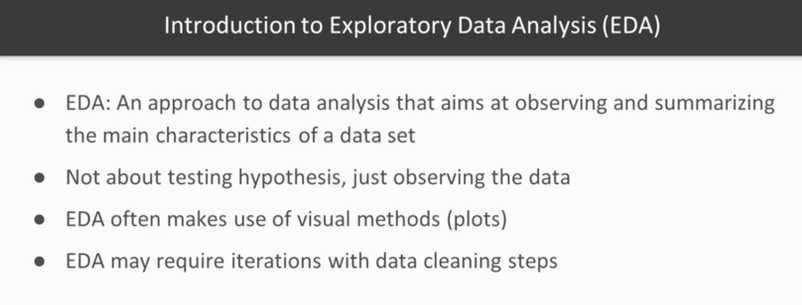


In [59]:
import pandas as pd
data=pd.read_csv("data/titanic.csv")
len(data)

891

In [60]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
data.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [63]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
data[["age","fare"]].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [68]:
data['age'].min(),data['age'].max(),data['age'].mean()

(0.41999999999999998, 80.0, 29.69911764705882)

In [72]:
data['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [74]:
data['sex'].value_counts()/len(data)*100

male      64.758698
female    35.241302
Name: sex, dtype: float64

In [75]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [76]:
data['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [77]:
data['pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: pclass, dtype: int64

In [1]:
data['age'].value_counts()

In [80]:
#按照年龄段分段
bins=[0,18,25,35,45,55,65,75,80]
data['agegroup']=pd.cut(data['age'],bins)
data['agegroup'].value_counts().sort_index()

(0, 18]     139
(18, 25]    162
(25, 35]    196
(35, 45]    114
(45, 55]     63
(55, 65]     32
(65, 75]      7
(75, 80]      1
Name: agegroup, dtype: int64

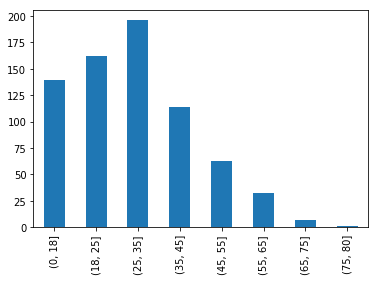

In [81]:
#绘制按照年龄段的图形
%matplotlib inline
data['agegroup'].value_counts().sort_index().plot(kind='bar')

# 1.3  getting data in the right shape: pre-processing and cleaning
- identifying data that needs prepfocessing
- dealing with missing data
- getting data in the right shape

In [119]:
data_file="data/titanic.csv"

In [120]:
import pandas as pd
import numpy as np
data=pd.read_csv(data_file)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [121]:
len(data)

891

In [122]:
data.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [123]:
#判断数值是否重复
data.duplicated().value_counts()

False    784
True     107
dtype: int64

In [124]:
data['age'].duplicated().value_counts()

True     802
False     89
Name: age, dtype: int64

In [125]:
#按照年龄去重后
data[data['age'].duplicated()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True


In [126]:
data[data['age']==22.00]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
80,0,3,male,22.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
112,0,3,male,22.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
141,1,3,female,22.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,yes,True
151,1,1,female,22.0,1,0,66.6000,S,First,woman,False,C,Southampton,yes,False
212,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
225,0,3,male,22.0,0,0,9.3500,S,Third,man,True,NaN,Southampton,no,True
243,0,3,male,22.0,0,0,7.1250,S,Third,man,True,NaN,Southampton,no,True
287,0,3,male,22.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


## dropping columns with missing data

In [127]:
data['xyz']=np.nan
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,xyz
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN


In [128]:
#删除全部为空值的列
data=data.dropna(how='all',axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## filling in missing data

In [129]:
data['age'].count()

714

In [130]:
data["age"].mean()

29.69911764705882

In [133]:
#用-1000填充age中的空值
data['age']=data['age'].fillna(-1000)

In [134]:
data['age'].mean()

-174.8539057239057

## transforming data

In [153]:
data['embarked'].value_counts()

S    644
C    168
Q     77
u      2
Name: embarked, dtype: int64

In [154]:
data['embarked'].count()

891

In [155]:
data['embarked']=data['embarked'].fillna('U')

In [161]:
port_names={
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'U': 'Unknown'
}
data['embarked']=data['embarked'].map(lambda x:port_names[x])
#.map for Series,.applymap() for DataFrame
data.head()

KeyError: 'u'

# 2.1 tokenization-from documents to words
## nltk-natural language toolkit
- nlk:python library for nlp applications(http://nltk.org)
- $$conda install nltk
- $python -m nltk.downloader punkt stopwords wordnet
- $python -m nltk.downloader all # ~ 2GB of data
- more on data installation:http://www.nltk.org/data.html

## tokenization
### word tokenization

In [187]:
s="the quick brown fox jumped over the lazy dog"
s.split()

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

In [188]:
s="the quick borwn fox, and a lazy dog"
s.split()

['the', 'quick', 'borwn', 'fox,', 'and', 'a', 'lazy', 'dog']

In [3]:
#????????
from nltk.tokenize import word_tokenize
s="the quick brown fox, and a lazy dog"
word_tokenize(s)
# import nltk
# nltk.download('punkt')

['the', 'quick', 'brown', 'fox', ',', 'and', 'a', 'lazy', 'dog']

In [4]:
s="Dr. Smith is visiting the patient"
word_tokenize(s)

['Dr.', 'Smith', 'is', 'visiting', 'the', 'patient']

In [5]:
s="USA vs. U.S.A"
word_tokenize(s)

['USA', 'vs.', 'U.S.A']

## sentence tokenization a.k.a. sentence segmentation

In [10]:
a="Text with many sentences. This is a sentence."
word_tokenize(a)

['Text', 'with', 'many', 'sentences', '.', 'This', 'is', 'a', 'sentence', '.']

In [9]:
from nltk.tokenize import sent_tokenize
s="Text with many sentences. this is a sentence"
sent_tokenize(s)

['Text with many sentences.', 'this is a sentence']

In [11]:
s="Text with many sentences. this is a sentence"
for sentence in sent_tokenize(s):
    print(word_tokenize(sentence))

['Text', 'with', 'many', 'sentences', '.']
['this', 'is', 'a', 'sentence']


## different data domains(e.g Twitter)

In [13]:
s="hi @marcobornzanini just an example! :D http://example.com #NLP"
word_tokenize(s)

['hi',
 '@',
 'marcobornzanini',
 'just',
 'an',
 'example',
 '!',
 ':',
 'D',
 'http',
 ':',
 '//example.com',
 '#',
 'NLP']

In [14]:
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer()
s="hi @marcobornzanini just an example! :D http://example.com #NLP"
tokenizer.tokenize(s)

['hi',
 '@marcobornzanini',
 'just',
 'an',
 'example',
 '!',
 ':D',
 'http://example.com',
 '#NLP']

## phrases
capture concepts like "quick brown fox","good movie" or "nice restaurant"

In [16]:
from nltk import bigrams,trigrams,ngrams
s="the quick brown fox jumped over the lazy dog"
tokens=word_tokenize(s)
list(bigrams(tokens))

[('the', 'quick'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('fox', 'jumped'),
 ('jumped', 'over'),
 ('over', 'the'),
 ('the', 'lazy'),
 ('lazy', 'dog')]

In [17]:
list(trigrams(tokens))

[('the', 'quick', 'brown'),
 ('quick', 'brown', 'fox'),
 ('brown', 'fox', 'jumped'),
 ('fox', 'jumped', 'over'),
 ('jumped', 'over', 'the'),
 ('over', 'the', 'lazy'),
 ('the', 'lazy', 'dog')]

In [18]:
list(ngrams(tokens,2))

[('the', 'quick'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('fox', 'jumped'),
 ('jumped', 'over'),
 ('over', 'the'),
 ('the', 'lazy'),
 ('lazy', 'dog')]

# 2.2 stop words and punctuation removal

### stop-words
- words that are very frequent
- but don't carry particular meaning in isolation
- for example:"of","the","a","with",...
   - "this is a good movie"->"good movie"
- when part of longer phrases,they could be helpful
   - "the who"(rock band)
   - "to be or not to be"(shakespeare)
- in a data set of movie review,the word"movie"is a stop-word
- no universal list of stop-words
- nltk offers a starting point(~150 words)
- pros:
 - remove non-informative words
 - reduce memory overhead
 - reduce noise
- cons:
 - benefits to be tested(application/domain dependent)
 - memory and disk space less of an issue nowadays

## stop-words

In [23]:
from nltk.corpus import stopwords
stop_list=stopwords.words('english')
stop_list


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
len(stop_list)

179

## punctuation

In [25]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
list(punctuation)

In [31]:
stop_list+=list(punctuation)
len(stop_list)

245

In [33]:
stop_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## adding custom words

In [35]:
stop_list+=['rt','via'] #custom list
len(stop_list)

251

## fun with unicode
- unicode categories: https/en.wikipedia.org/wiki/unicode_character_property#general_category
- punctuation categories are labelled as p*

In [36]:
from unicodedata import category

In [37]:
category("A") #letter,uppercase

'Lu'

In [38]:
category("a") # letter,lowercase

'Ll'

In [39]:
category('.') #punctuation,other

'Po'

In [40]:
dashes=['-','-','-','-','-'] #https://en.wikipedis.org/wiki/Dash#Common_dashes
'-' is dashes

False

In [41]:
for d in dashes:
    print(category(d))

Pd
Pd
Pd
Pd
Pd


In [42]:
def is_unicode_punct(token):
    try:
        return category(token).startwith("p")
    except:
        return False

In [43]:
is_unicode_punct('A')

False

In [44]:
is_unicode_punct('.')

False

In [45]:
is_unicode_punct('HELLOOO')

False

## putting everything together

In [47]:
from nltk.tokenize import word_tokenize
text="""python is a widely used high-level programming
language for general-purpose programming,
created by Guido van Rossum and first released in 1991."""
#text from https:/enwikipedia.org/wiki/Python_(programming_language)
tokens=word_tokenize(text)
tokens

['python',
 'is',
 'a',
 'widely',
 'used',
 'high-level',
 'programming',
 'language',
 'for',
 'general-purpose',
 'programming',
 ',',
 'created',
 'by',
 'Guido',
 'van',
 'Rossum',
 'and',
 'first',
 'released',
 'in',
 '1991',
 '.']

In [49]:
tokens_no_stop=[t for t in tokens
               if t not in stop_list and not is_unicode_punct(t)]
tokens_no_stop

['python',
 'widely',
 'used',
 'high-level',
 'programming',
 'language',
 'general-purpose',
 'programming',
 'created',
 'Guido',
 'van',
 'Rossum',
 'first',
 'released',
 '1991']

# 2.3 text normalization
## text normalization
- normalizing text=Converting tokens into their cononical form
- text normalization guarantees input to be consistent
- simplest example:Case normalization(for example,Python versus python)
- stemming,lemmatization,british-to-american spellings,synonym mapping,spellchecking,and so on
- no universal "all-purpose" text normalization

## stemming
- mapping a token into its stem
- classic approach:porter stemmer
- chopping the suffix of a word,based on rules
- for example:"fishing","fish",and "fisher" all map into "fish"
- a stem is not always a proper word

##  lemmatization
- mapping a token into its lemma
- more expensive than stemming
- <br>requires external lexical resources and knowledge about text</br>
  <br>(for example,part-of-speech tagging)</br>
- "smarter" than stemming, can capture irregular verbs
- for example - "am","is", and "are" all map into "be"(if labeled as verbs)
- a lemma is a proper word

### case normalization

In [50]:
'Python'=='python'

False

In [51]:
'Python'.lower()=='python'.lower()

True

### stemming

In [56]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
stemmer.stem('fish')

'fish'

In [57]:
stemmer.stem('fishing')

'fish'

In [58]:
stemmer.stem('fishes')

'fish'

### lemmatization
<br>requires part-of speech(pos)tag</br>
- a=adjecttive
- v=verb
- n=noun
- r=adverb

In [63]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
lemmatizer.lemmatize('having')


'having'

In [65]:
lemmatizer.lemmatize('having',pos='v')

'have'

In [66]:
lemmatizer.lemmatize('have',pos='v')

'have'

In [67]:
lemmatizer.lemmatize('had',pos='v')

'have'

In [68]:
lemmatizer.lemmatize('be',pos='v')

'be'

In [69]:
lemmatizer.lemmatize('am',pos='v')

'be'

In [70]:
lemmatizer.lemmatize('was',pos='v')

'be'

### synonym mapping

In [71]:
synonyms={
    'large':'big',
    'purchase':'buy'
}

text="I want to puchase a large book on big data"
tokens=text.lower().split()
tokens

['i', 'want', 'to', 'puchase', 'a', 'large', 'book', 'on', 'big', 'data']

In [72]:
new_text=[synonyms.get(t,t) for t in tokens]
new_text

['i', 'want', 'to', 'puchase', 'a', 'big', 'book', 'on', 'big', 'data']

# 2.4 calculating word frequencies

### installing the Data Set
- we are using the "Movie Reviews" data set from nltk
- installation: $ python -m nltk.downloadermovie_reviews
- 2000 documents:1000 positive +1000 negative
- pre-processed:tokenized and lowercased

## get the data
$ python -m nltk.downloadser moview_reviews

In [73]:
from nltk.corpus import movie_reviews

In [75]:
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [76]:
len(movie_reviews.fileids())

2000

In [77]:
len(movie_reviews.fileids('pos')),len(movie_reviews.fileids('neg'))

(1000, 1000)

In [78]:
pos_reviews=[movie_reviews.words(fileid) 
            for fileid in movie_reviews.fileids('pos')]
neg_reviews=[movie_reviews.words(fileid)
            for fileid in movie_reviews.fileids('neg')]

## term frequencies

In [79]:
one_review=pos_reviews[10]
from collections import Counter
c=Counter(one_review)
c.most_common(20)

[(',', 45),
 ('the', 44),
 ('.', 44),
 ('a', 39),
 ('and', 20),
 ('of', 17),
 ('-', 17),
 ('to', 17),
 ('in', 16),
 ('(', 15),
 (')', 15),
 ('"', 14),
 ('is', 14),
 ('for', 12),
 ('that', 11),
 ('with', 8),
 ('i', 7),
 ('it', 7),
 ('his', 7),
 ('as', 6)]

In [80]:
from nltk.corpus import stopwords
from string import punctuation

stop_list=stopwords.words('english')+list(punctuation)
one_review_no_stop=[word for word in one_review if word not in stop_list]
c=Counter(one_review_no_stop)
c.most_common(20)

[('race', 5),
 ('movie', 4),
 ('key', 4),
 ('would', 4),
 ('rat', 3),
 ('another', 3),
 ('first', 3),
 ('sinclair', 3),
 ('las', 3),
 ('vegas', 3),
 ('high', 3),
 ('together', 3),
 ('gets', 3),
 ('man', 3),
 ('driver', 3),
 ('beverly', 3),
 ('film', 2),
 ('performances', 2),
 ('flat', 2),
 ('fun', 2)]

## frequencies across the whole collection

In [83]:
from itertools import chain
all_positive=list(chain(*pos_reviews))
all_negative=list(chain(*neg_reviews))
all_positive

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 ',',
 'whether',
 'they',
 "'",
 're',
 'about',
 'superheroes',
 '(',
 'batman',
 ',',
 'superman',
 ',',
 'spawn',
 ')',
 ',',
 'or',
 'geared',
 'toward',
 'kids',
 '(',
 'casper',
 ')',
 'or',
 'the',
 'arthouse',
 'crowd',
 '(',
 'ghost',
 'world',
 ')',
 ',',
 'but',
 'there',
 "'",
 's',
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 '.',
 'for',
 'starters',
 ',',
 'it',
 'was',
 'created',
 'by',
 'alan',
 'moore',
 '(',
 'and',
 'eddie',
 'campbell',
 ')',
 ',',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 "'",
 '80s',
 'with',
 'a',
 '12',
 '-',
 'part',
 'series',
 'called',
 'the',
 'watchmen',
 '.',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'mich

In [84]:
total_freq=Counter(all_positive)
total_freq.most_common(20)

[(',', 42448),
 ('the', 41471),
 ('.', 33714),
 ('a', 20196),
 ('and', 19896),
 ('of', 18636),
 ('to', 16517),
 ("'", 15268),
 ('is', 14059),
 ('in', 11725),
 ('s', 9659),
 ('"', 8492),
 ('it', 8351),
 ('that', 8121),
 ('-', 7931),
 ('as', 6478),
 (')', 6039),
 ('(', 6014),
 ('with', 5851),
 ('his', 5588)]

In [86]:
all_positive_no_stop=[t for t in all_positive if t not in stop_list]
all_negative_no_stop=[t for t in all_negative if t not in stop_list]
total_freq_no_stop=Counter(all_positive_no_stop)
total_freq_no_stop.most_common(20)

[('film', 5230),
 ('one', 3052),
 ('movie', 2525),
 ('like', 1802),
 ('good', 1248),
 ('story', 1246),
 ('time', 1243),
 ('also', 1200),
 ('even', 1179),
 ('well', 1123),
 ('character', 1078),
 ('life', 1057),
 ('much', 1038),
 ('would', 1019),
 ('first', 1004),
 ('two', 999),
 ('characters', 986),
 ('see', 965),
 ('way', 929),
 ('--', 906)]

In [87]:
from nltk import FreqDist
f=FreqDist(all_positive)
f.most_common(20)

[(',', 42448),
 ('the', 41471),
 ('.', 33714),
 ('a', 20196),
 ('and', 19896),
 ('of', 18636),
 ('to', 16517),
 ("'", 15268),
 ('is', 14059),
 ('in', 11725),
 ('s', 9659),
 ('"', 8492),
 ('it', 8351),
 ('that', 8121),
 ('-', 7931),
 ('as', 6478),
 (')', 6039),
 ('(', 6014),
 ('with', 5851),
 ('his', 5588)]

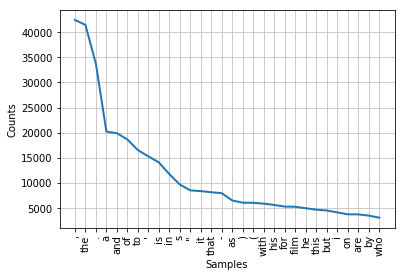

In [88]:
%matplotlib inline
f.plot(30)

In [90]:
f=FreqDist(all_positive_no_stop)
f.most_common(20)

[('film', 5230),
 ('one', 3052),
 ('movie', 2525),
 ('like', 1802),
 ('good', 1248),
 ('story', 1246),
 ('time', 1243),
 ('also', 1200),
 ('even', 1179),
 ('well', 1123),
 ('character', 1078),
 ('life', 1057),
 ('much', 1038),
 ('would', 1019),
 ('first', 1004),
 ('two', 999),
 ('characters', 986),
 ('see', 965),
 ('way', 929),
 ('--', 906)]

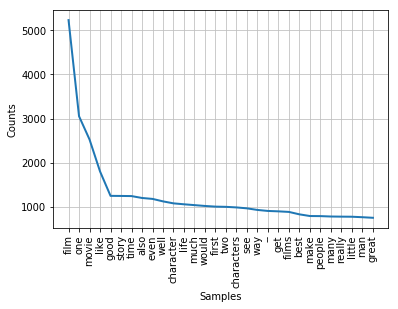

In [91]:
f.plot(30)

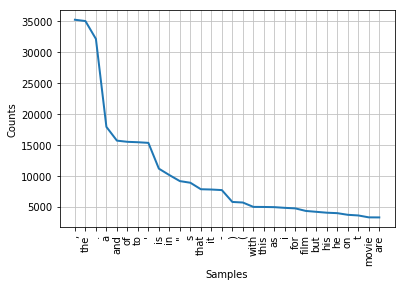

In [92]:
f=FreqDist(all_negative)
f.plot(30)

### Zipf's Law
https://enwikipedia.org/wiki/Zipf%27s_law

# 3.1 introduction to  scikit-learn for Machine Learning
- scikit-learn -python library for machine learning
- simple to use,yet very efficient tool
- out-of-the-box implementation for:
    - calssification,clustering,regression,and evaluation
    - data pre-processing,model selection,and evaluation
- built on top of numpy,scipy,and matplotlib

## main components of scikit-learn
- data sets-toy data sets(iris,boston,...) and facilities to access other common data sets
- data transformation -feature extraction(vectorizers),standardization,
  <br>normalization,binarization,</br>
- algorithms for supervised and unsupervised learning
- cross-validation,parameter tuning,and evaluation metrics

## approaching a machine learning problem with scikit-learn
- scoping the problem:
    - predicting aquantity? regression
    - predicting a class/category? classification
    - grouping items? clustering
- get data in shape -vectorizer.fit_transform()
- training-estimator.fit()
- prediction-estimator.predict()
- http://scikit-learn.org/stable/tutorial/machine_learning_map

# 3.2 regression analysis-predicting a quantity
- data set:boston house prices(shipped with scikit-learn)
- fulldata set docs:http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

## load up the data

In [93]:
from sklearn.datasets import load_boston
boston=load_boston()

In [94]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [95]:
boston.data[0]

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00])

In [96]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

## quick look at the data

In [97]:
import pandas as pd
data=pd.DataFrame(boston.data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [98]:
data['PRICE']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## house price prediction

In [99]:
X=data[['RM']] #only one feature first
Y=data['PRICE']

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [101]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
Y_prediction=model.predict(X_test)

In [102]:
Y_prediction[0]

22.974291646390476

In [103]:
Y_test.values[0]

22.600000000000001

## evaluation
- mean squared error

Text(0.5,1,'price vs predicted prices')

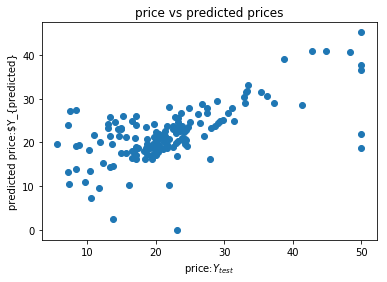

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_prediction)
plt.xlabel("price:$Y_{test}$")
plt.ylabel("predicted price:$Y_{predicted}")
plt.title("price vs predicted prices")

In [105]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_prediction)
mse

47.033047479755183

In [106]:
X=data.drop('PRICE',axis=1) #all features
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [107]:
model=LinearRegression()
model.fit(X_train,Y_train)
Y_prediction=model.predict(X_test)

Text(0.5,1,'prices vs predicted prices: $Y_i$ vs $ \\hat{Y}_i$')

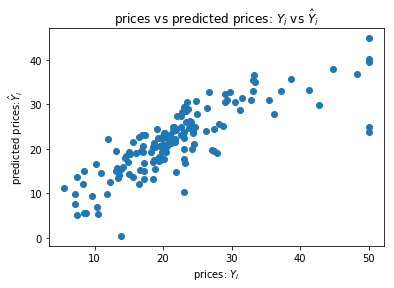

In [108]:
plt.scatter(Y_test,Y_prediction)
plt.xlabel('prices: $Y_i$')
plt.ylabel('predicted prices:$\hat{Y}_i$')
plt.title('prices vs predicted prices: $Y_i$ vs $ \hat{Y}_i$')

In [109]:
mse=mean_squared_error(Y_test,Y_prediction)
mse

27.183847647602384

# 3.3 binary classification-predicting a label(out of two)
### get the data
$ python -m nltk.downloader movie_reviews

In [110]:
from nltk.corpus import movie_reviews as data
# import nltk
# nltk.download('movie_reviews')

In [111]:
data.categories()

['neg', 'pos']

In [112]:
data.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [113]:
data.raw('neg/cv029_19943.txt')

'one-sided " doom and gloom " documentary about the possible annihilation of the human race as foretold by the bible . \norson welles narrates and appears in the film in which he , along with best-selling author hal lindsey , discusses various prophecies from the bible and relates them to recent ( well for 1976 anyway ) events . \nthe film is dated badly , as many things that are supposed to happen in the " future " never do . \nfor example , the planets of the solar system were supposed to line up in the year 1982 and cause chaos here on earth . \nwe\'re still here . \nthe arms race between the soviets and america was supposed to kick-off the apocalypse . \nwe\'re still here . \nsome of the more ludicrous moments come when it\'s alluded to that people like jimmy carter and henry kissinger may actually be the antichrist ( ! ) . \nalso , there\'s ten minutes of stock footage at the end of the film meant to give us an idea of what the battle for armageddon might be like . \nif it\'s anyt

In [114]:
len(data.fileids('pos')),len(data.fileids('neg'))

(1000, 1000)

# preparing the data

In [115]:
corpus=[data.raw(fileid) for fileid in data.fileids('pos')]
corpus+=[data.raw(fileid) for fileid in data.fileids('neg')]

target=['pos']*1000#['pos','pos',....1000]
target+=['neg']*1000

- TF=Term Frequency
- IDF=Inverse Document Frequency

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=5,max_df=0.8)
X=vectorizer.fit_transform(corpus)

In [117]:
X.shape

(2000, 13290)

### first attempt at classification

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_text=train_test_split(X,target,test_size=0.2,random_state=0)

ValueError: too many values to unpack (expected 3)

In [37]:
from sklearn.svm import LinearSVC
classifier=LinearSVC()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)

ValueError: Unknown label type: 'continuous'

## evaluation

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import calssification_report
print("precision:{}".format(precision_score(Y_test,Y_pred,average='macro')))
print("Recall:{}".format(recall_score(Y_test,Y_pred,average='macro')))
print("f1-score:{}".format(f1_score(Y_test,Y_pred,average='macro')))

In [ ]:
print(classification_report(Y_test,Y_pred,digits=4))

## cross-validation

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
cross_val_score(classifier,X,target,cv=cv,scoring='f1_macro')

In [ ]:
cross_val_score(classifier,X,target,cv=cv,scoring='f1_macro').mean()

In [ ]:
cross_val_score(classifier,X,target,cv=cv,scoring='precision_macro').mean()

In [ ]:
cross_val_score(classifier,X,target,cv=cv,scoring='recall_macro').mean()

In [ ]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=10,shuffle=True,random_state=0)
cross_val_score(classifier,X,target,cv=cv,scoring='f1_macro')

In [39]:
cross_val_score(classifier,X,target,cv=cv,scoring='f1_macro').mean()

# 3.4 multi-class classification-Predicting a label(out of many)
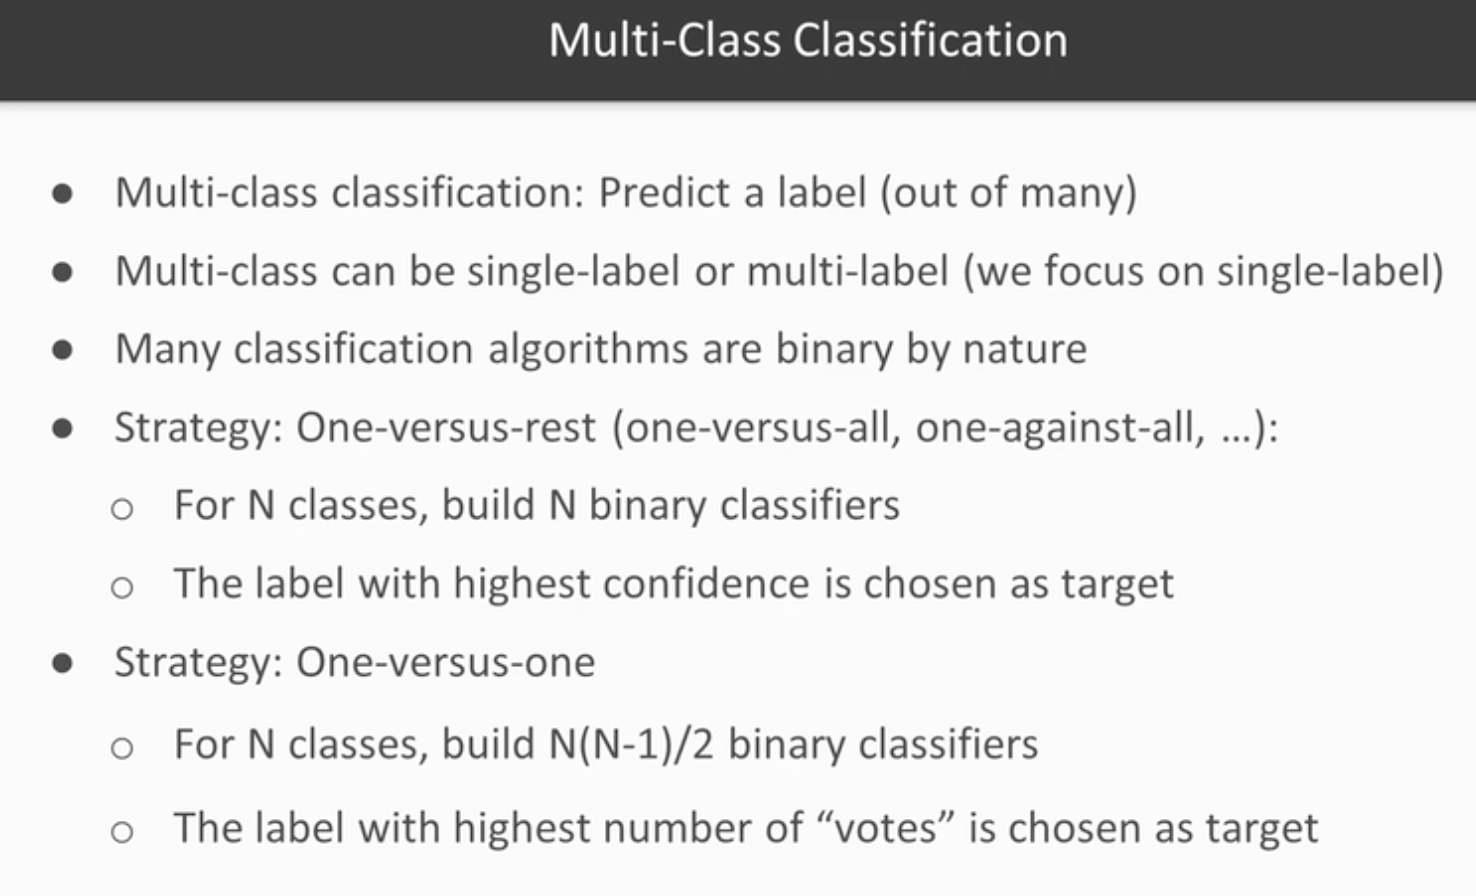

# 3.5 cluster analysis-grouping similar items
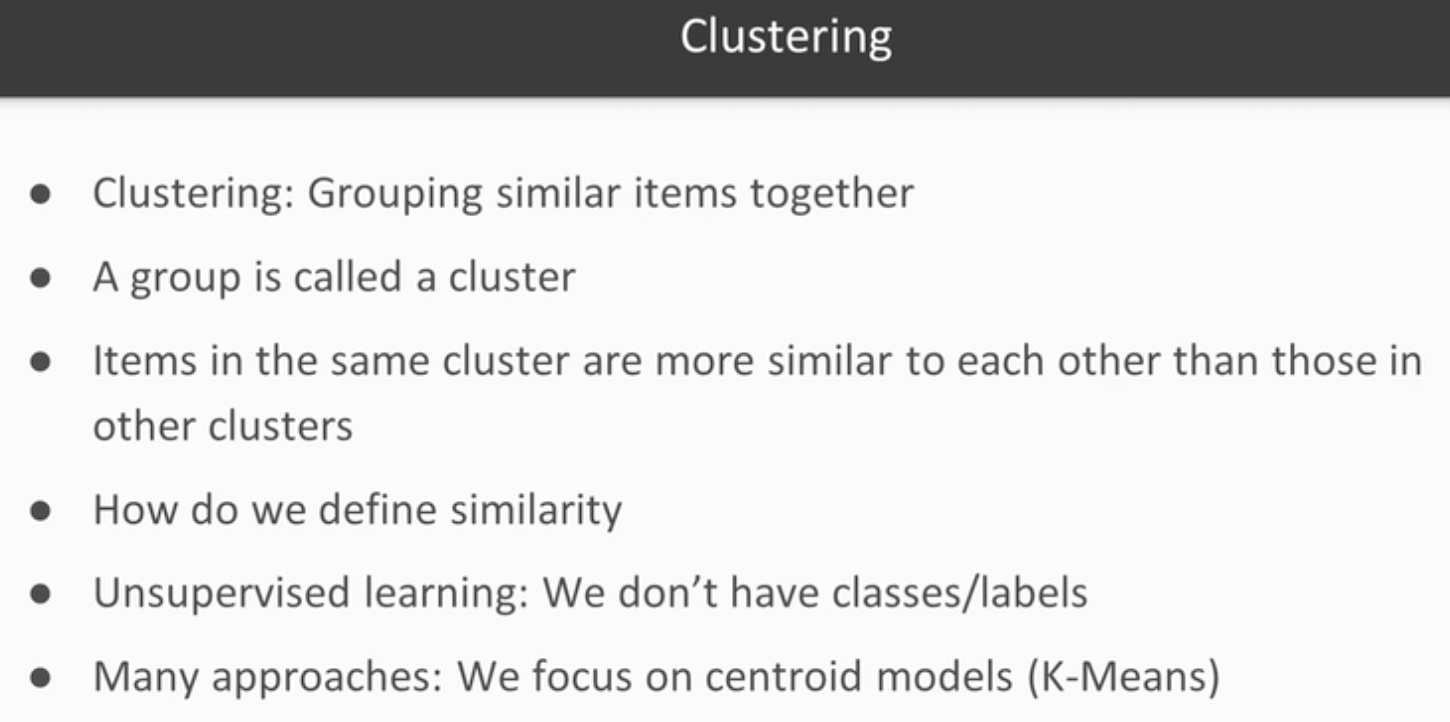

## get the data

In [42]:
import numpy as np
data=np.random.rand(100,2)

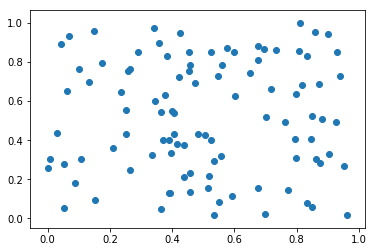

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

x=[item[0] for item in data]
y=[item[1] for item in data]
#x,y=zip(*data)
plt.scatter(x,y)
plt.show()

## clustering

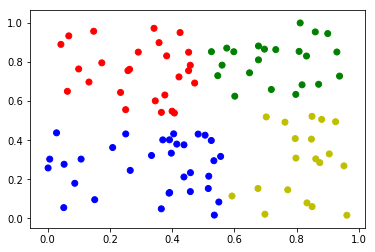

In [45]:
from sklearn.cluster import KMeans

estimator=KMeans(n_clusters=4)
estimator.fit(data)

colours=['r','g','b','y'] #red,green,blue,yellow
predicted_colours=[colours[label] for label in estimator.labels_]
plt.scatter(x,y,c=predicted_colours)
plt.show()

# 4.1 time series and recommender systems
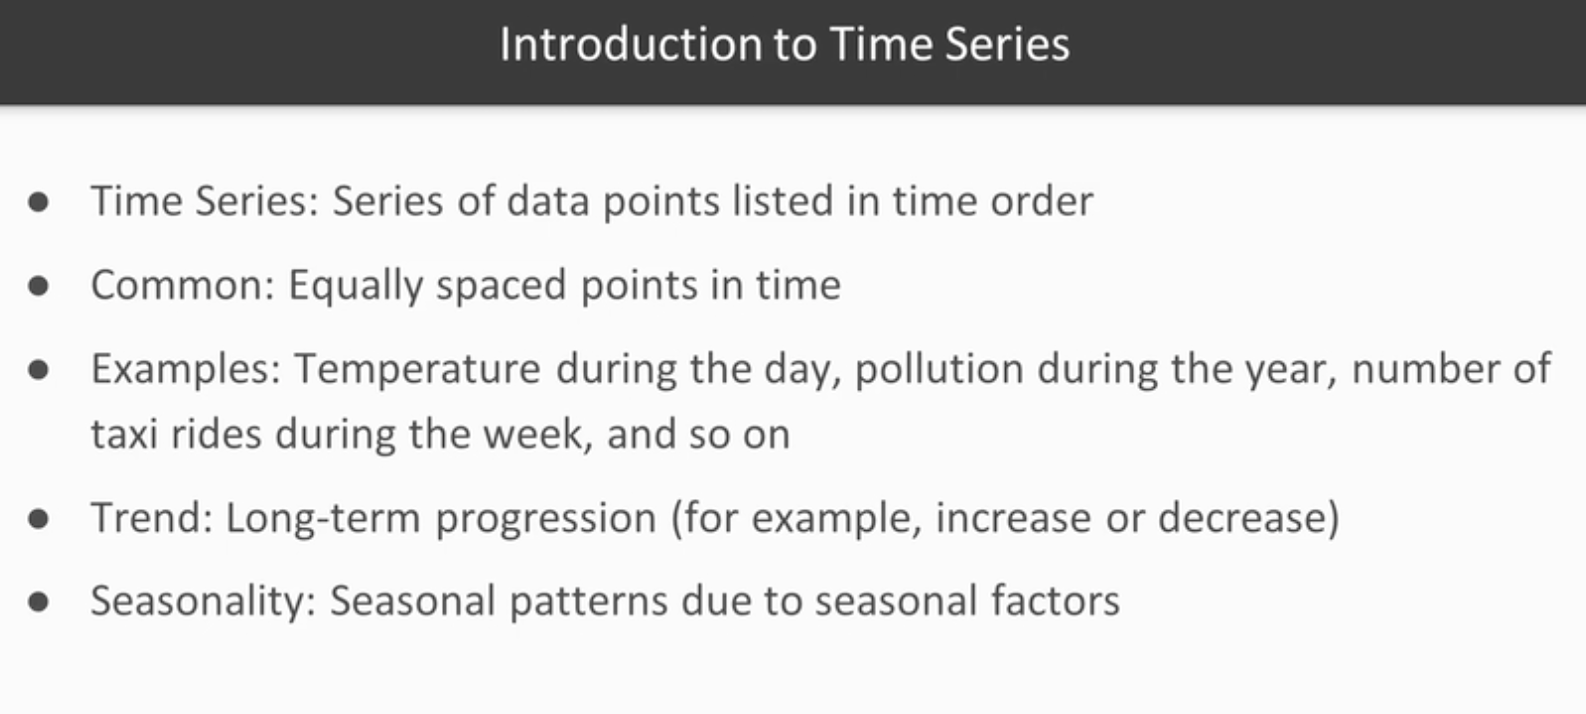

## get the data
- data from: https://datamarket.com/set/22u3/international-airfine-passengers-monthly-totals-in-thousands-49-dec-60
- ref:time series analysis: froecasting and control(1970)Box,Jenkins and Reinsel

In [ ]:
import pandas as pd
fname='Airpassengers.csv'
data=pd.read_csv(fname)
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data.dtypes

In [ ]:
data['month']=pd.to_datatime(data['month'])
data.head()

In [ ]:
data.dtypes

In [ ]:
data['month'].dt.year.head()

In [ ]:
data=data.set_index('month')
data.head()

In [47]:
%matplotlib inline
data.plot(grid='on')

In [ ]:
from datetime import datetime
start_date=datetime(1959,1,1)
end_date=datetime(1960,12,1)
data[(start_date<=data.index)&(data.index<=end_date)].plot(grid='on')

## time series decomposition
- additive model
- y(t)=trend(t)+seasonal(t)+residual(t)

In [ ]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(data,model='additive')
fig=decomposition.plot()
# decomposition.plot() #if using outside notebook

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[12.0,8.0]#double up default plot size

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig,ax=plt.subplots()
ax.grid(True)

year=mdates.YearLocator(month=1)
month=mdates.MonthLocator(interval=3)
year_format=mdates.DateForMATER('%Y')
month_format=madates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True,which='minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(data.index,data['AirPassengers'],c='blue')
plt.plot(decomposition.trend.index,decomposition.trend,c='red')

# 4.2 building a movie recommendation system
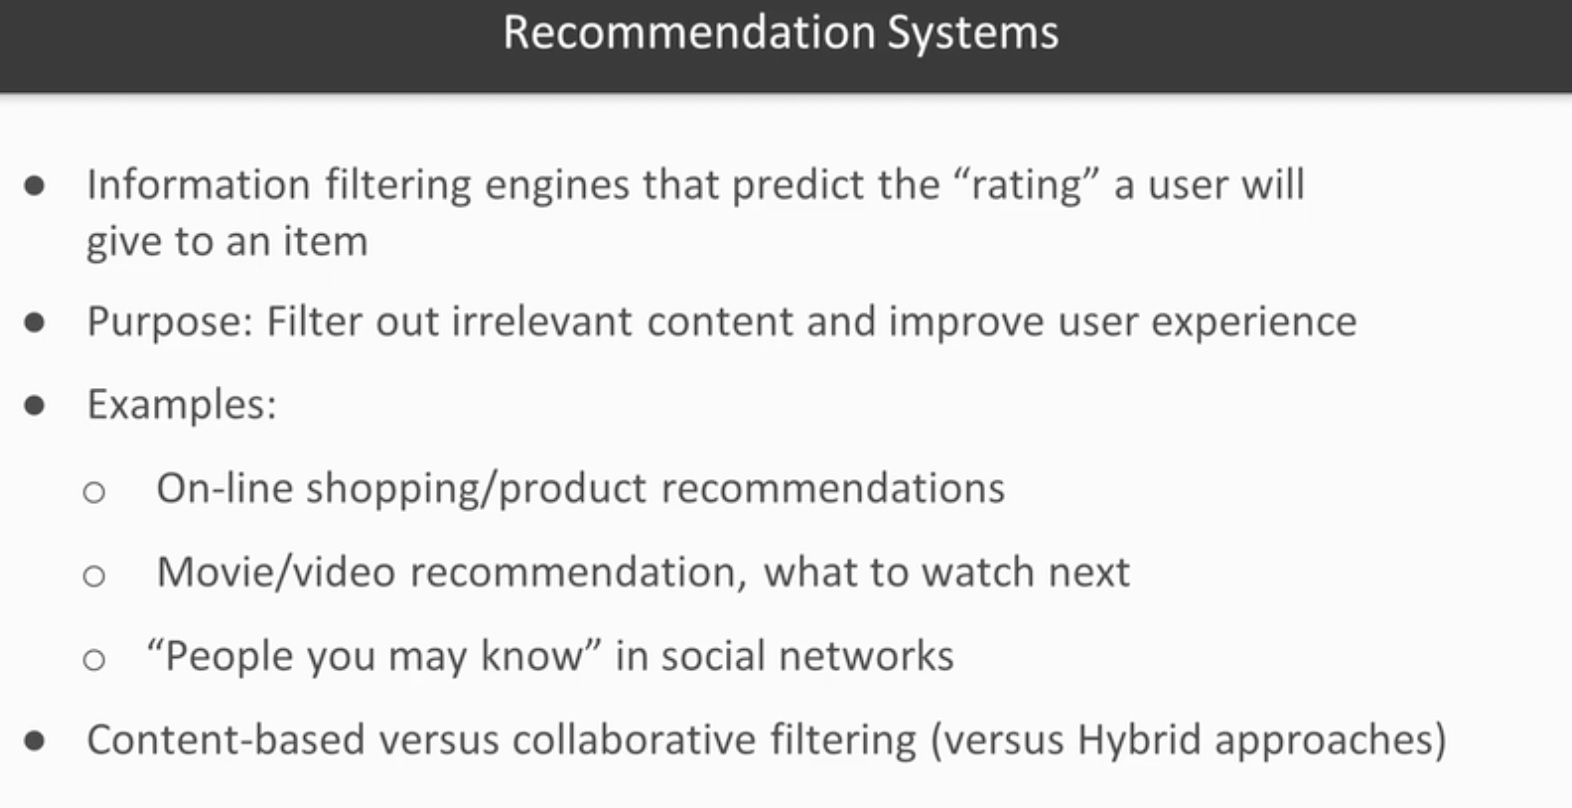

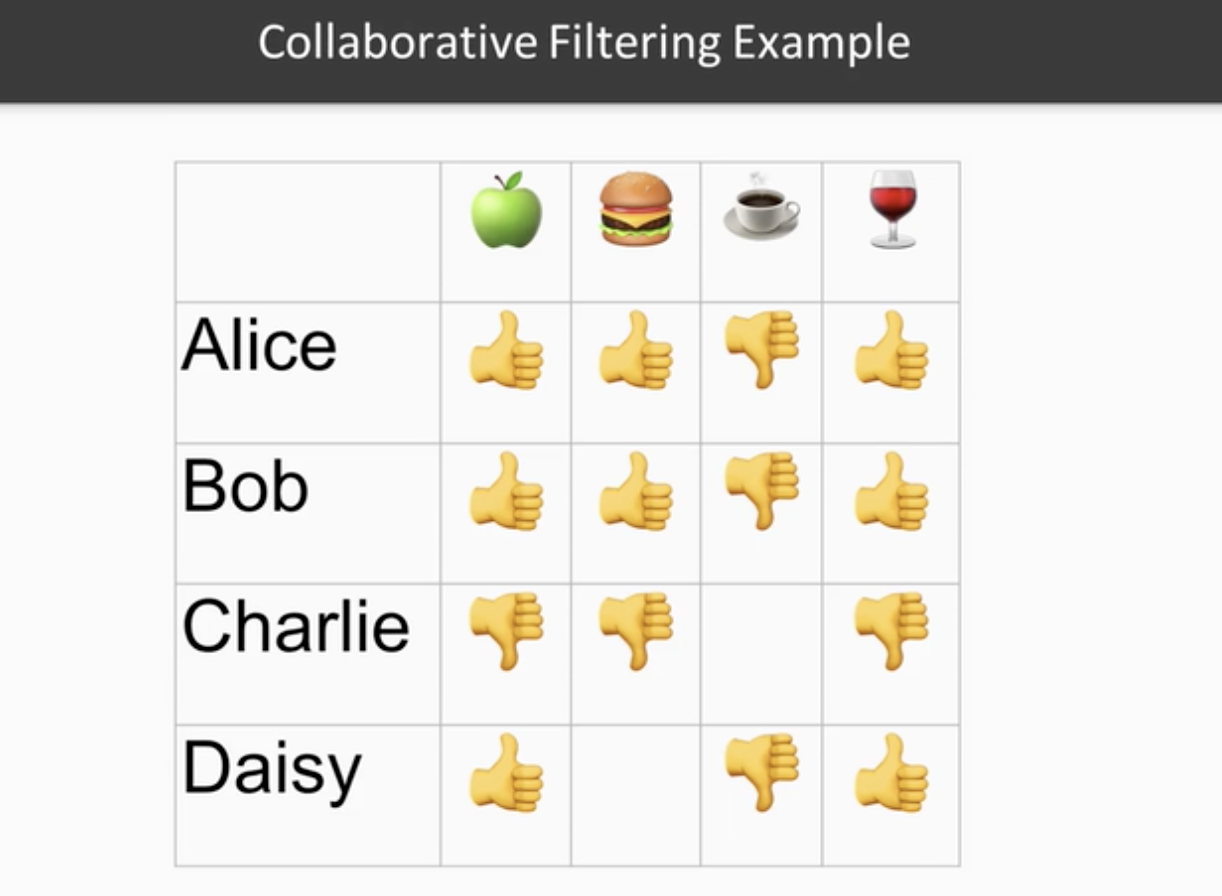

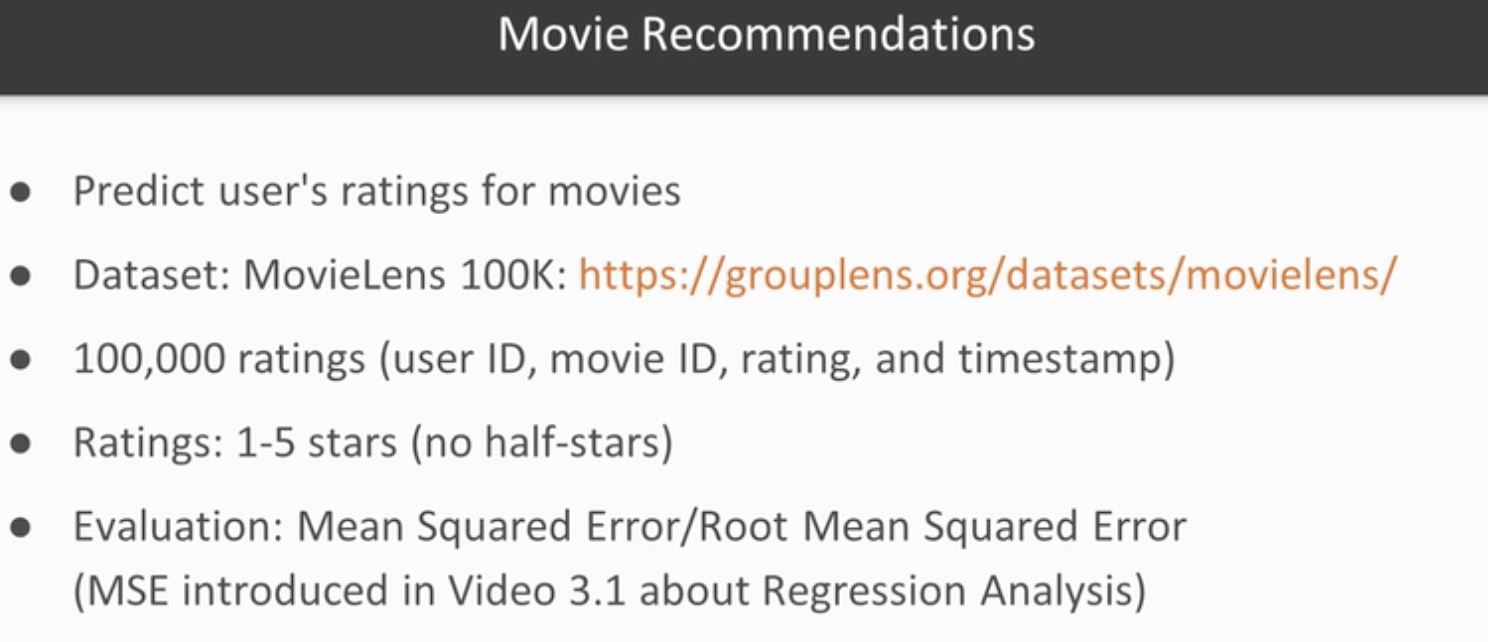

#  python machine learning algorithem

In [10]:
import numpy as np
import matplotlib.pyplot as plt
raw_data_X=np.random.uniform(2,5,size=(10,2))
raw_data_X

array([[ 4.29646035,  4.92209982],
       [ 3.48566949,  2.887078  ],
       [ 3.79072071,  3.01891066],
       [ 3.7394326 ,  2.9375163 ],
       [ 2.93151467,  2.71385415],
       [ 2.23535113,  4.77840007],
       [ 2.93415425,  4.24020273],
       [ 2.40895529,  3.28398474],
       [ 4.92786082,  3.07085889],
       [ 4.49159926,  3.09743139]])

In [13]:
raw_data_Y=np.random.randint(0,2,size=10)
raw_data_Y

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

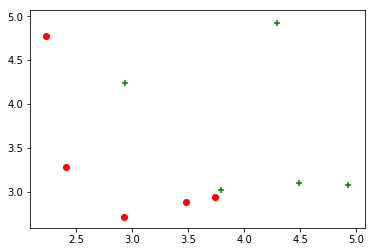

In [26]:
X_train=raw_data_X
Y_train=raw_data_Y
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],color='r',marker='o')
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],color='g',marker='+')
plt.show()

In [44]:
x=np.array([8.435,3.456])

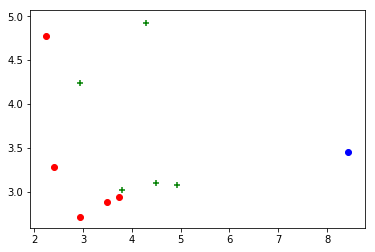

In [45]:
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],color='r',marker='o')
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],color='g',marker='+')
plt.scatter(x[0],x[1],color='b')
plt.show()

In [47]:
from math import sqrt
distance=[]
for item in X_train:
    b=sqrt(np.sum((item-x)**2))
    distance.append(b)
distance

[4.390553397179346,
 4.981921789884031,
 4.664801946988217,
 4.724106115753079,
 5.553299127874213,
 6.339115717833882,
 5.556462715077146,
 6.028499326483788,
 3.528223189192938,
 3.9596692882795286]

In [48]:
distance2=[sqrt(np.sum((item-x)**2)) for item in X_train]
distance2

[4.390553397179346,
 4.981921789884031,
 4.664801946988217,
 4.724106115753079,
 5.553299127874213,
 6.339115717833882,
 5.556462715077146,
 6.028499326483788,
 3.528223189192938,
 3.9596692882795286]

In [50]:
nearest=np.argsort(distance2)


In [51]:
k=6

In [52]:
top_key_y=[Y_train[i] for i in nearest[:k]]
top_key_y

[1, 1, 1, 1, 0, 0]

In [54]:
from collections import Counter
votes=Counter(top_key_y)


In [63]:
predict=votes.most_common(1)[0][0]
predict

1

In [67]:
a= np.random.uniform(4,9,size=8)
a

array([ 6.0331533 ,  8.17900474,  7.55652447,  8.45383074,  8.26193373,
        5.21671093,  4.23143143,  8.75364507])

In [68]:
b=[4,5]

In [69]:
a[b]

array([ 8.26193373,  5.21671093])